# CS 4100 Homework 04: Connect Four 

#### Due Tuesday  3/14 at midnight (1 minute after 11:59 pm) in Gradescope (with a grace period of 6 hours)
#### You may submit the homework up to 24 hours late (with the same grace period) for a penalty of 10%. 

You must submit the homework in Gradescope as a zip file containing <b>two files:</b>
- The <code>.ipynb</code> file (be sure to <code>Kernel -> Restart and Run All</code> before you submit); and
- A <code>.pdf</code> file of the notebook. 

For best results obtaining a clean PDF file on the Mac, select <code>File -> Print Review</code> from the Jupyter window, then choose <code>File-> Print</code> in your browser and then <code>Save as PDF</code>.  Something  similar should be possible on a Windows machine. 

All homeworks will be scored with a maximum of 100 points; if point values are not given for individual
problems, then all problems will be counted equally. 

An Appendix is provided with examples of output for cases where the expected output is not able to 
be explained in comments. 
 

## Problem One: Interactive Connect 4 (30 pts)

In this first problem, you will create the basic functionality for an interactive version of the Connect 4 game,
in which you play against a naive player `player(...)` which simply chooses a random move. 
In the rest of the homework, you will write an improved `player(...)` which uses minmax to search for the best move. 

#### Setup and Rules of Connect 4

Connect 4 is a children's game consisting of an 8x8 frame in which you can drop either red or yellow disks in a  column; the disks fall to the bottom and can not be moved afterwards:

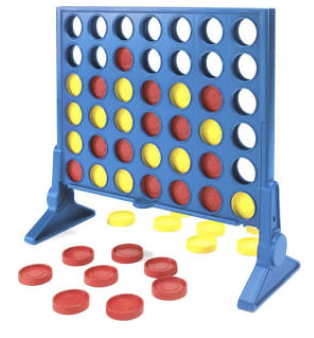

Two players (one taking red, the other yellow) take turns dropping the disks into the frame. We shall use `X` and `O` instead of red and yellow. 
The first player to get four across, down, or on a diagonal wins:


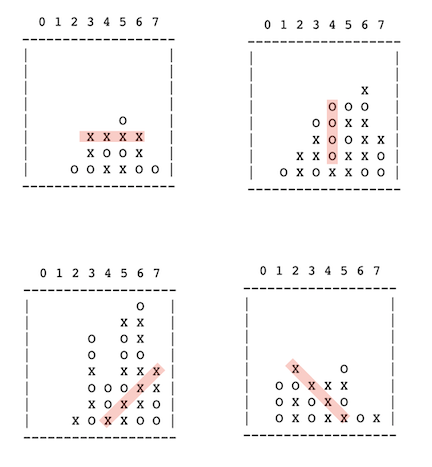

#### Utility Code

You must use this data structure for the board. 

In [2]:
import numpy as np

# Board is 8x8 numpy array
# 0 = no piece
# 1 = X piece
# 2 = O piece

blank = 0
X = 1
O = 2

symbol = [' ','X','O']

N = 8      

def getEmptyBoard():                              # use this function to create a fresh empty board
    return np.zeros((N,N)).astype(int)

# This will be used to indicate an error when you try to make a move in a column that is already full

ERROR = -1

# Check for error: use this function ONLY, since numpy arrays work strangely with comparisons

def isError(B):
    if type(B) == int:
        return B == ERROR
    else:
        return False

# Print out a human-readable version of the board, can indent if want to trace through the recursion

def printBoard(B,ind=0):
    indent = '\t'*ind
    if isError(B):
        print(indent,"ERROR: Overflow in column.")
        return
    print(indent,'  0 1 2 3 4 5 6 7')
    print(indent,'-------------------')
    for row in range(N):
        print(indent,'|',end='')
        for col in range(N):
            print(' '+ symbol[B[row][col]],end='')
        print(' |')
    print(indent,'-------------------')
    
printBoard(getEmptyBoard())
print()
printBoard(ERROR)

   0 1 2 3 4 5 6 7
 -------------------
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 -------------------

 ERROR: Overflow in column.


### Part A

Fill in the following template for `dropPiece` to allow players to drop pieces into the frame to make a move. 


Consult the Appendix to see the detailed outputs from the tests. 

In [4]:
# This function should make the indicated move on the input board, and return that board, or ERROR (-1)
# if there is no room in the column of the move.  Note that you are changing the original board
# IN PLACE, but also returning it, so you can indicate the error by returning ERROR (-1).
# Do NOT make a copy, as that is very inefficient!

# player is 1 (X) or 2 (O); 0 <= move <= 7; board is 8x8 numpy array as shown in first code cell.
# If move is illegal (either outside range 0..7) or there is no room in that column, return ERROR

def illegalMove(m):
    return not(0 <= m <= 7)

def noRoomInColumn(move,board):
    return board[0][move] != blank

def dropPiece(player,move,board):
    pass
    return board                     # just to get it to compile, you must write this function


# tests

# makeExample takes a list of X,O,X,O etc. moves and create a board. 
# May be useful for testing.  

def makeExample(moves):
    B = getEmptyBoard()
    player = X
    nextPlayer = O
    for m in moves:
        B = dropPiece(player,m,B) 
        if isError(B):               # NOTE: This is the way to check for an error return!
            return ERROR
        player,nextPlayer = nextPlayer,player
    return B


# Test out of range error -- See Appendix for what you should produce

if(dropPiece(X,100,getEmptyBoard())):
    print("Move outside range 0..7!")
else:
    print("Range test did not work. ")    
print()

# Test dropPiece

B = dropPiece(X,3,getEmptyBoard())
B = dropPiece(O,4,B)
B = dropPiece(X,0,B)
B = dropPiece(O,7,B)
B = dropPiece(X,5,B)
B = dropPiece(O,3,B)
B = dropPiece(X,4,B)
B = dropPiece(O,5,B)
B = dropPiece(X,5,B)
printBoard(B)
print()


L2R = list(range(8))
R2L = L2R[::-1]
M = (L2R + R2L) * 4


fullBoard = makeExample(M)
printBoard(fullBoard)
print()


# next one should return error message for any 0 <= m <= 7, since there is no room in any column

m = 4

print("No room in column "+str(m)+":",noRoomInColumn(m,fullBoard),'\n')

printBoard( dropPiece(X,m,fullBoard) )

### Part B

Next, you must write the function `checkWin`, which determines whether one of the players has
a winning configuration.

In [5]:
# player = 1 (X) or 2 (O)
# checkWin(X,board) returns X=1 if X wins,  else 0
# checkWin(O,board) returns O=2 if O wins,  else 0 

# No need to check if X and O both have winning sequences, since this will be used after each move.

def checkWin(player,board):    
    pass                   # Your code here       
    return 0


In [7]:
# tests

NoWins = [
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[0, 1, 0, 0, 2, 0, 0, 0],[0, 2, 0, 0, 1, 2, 1, 0],[0, 1, 0, 0, 2, 2, 1, 0],[1, 2, 0, 0, 2, 1, 2, 1],[2, 1, 2, 1, 2, 2, 1, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 1],[0, 1, 2, 0, 1, 0, 1, 1],[0, 2, 1, 0, 2, 0, 2, 2],[2, 1, 2, 0, 2, 0, 1, 2],[2, 1, 1, 2, 2, 1, 1, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 1, 0, 2, 0, 1],[0, 0, 0, 2, 0, 1, 2, 1],[0, 0, 2, 1, 0, 1, 2, 2],[0, 1, 1, 2, 0, 2, 1, 1],[2, 2, 1, 2, 0, 1, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 2, 0, 0, 0, 0, 0],[0, 0, 1, 0, 0, 0, 0, 0],[0, 2, 2, 0, 0, 0, 0, 2],[0, 2, 1, 0, 2, 1, 1, 2],[0, 2, 1, 0, 2, 1, 1, 2],[1, 1, 2, 1, 1, 2, 1, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[2, 0, 0, 0, 0, 0, 0, 0],[2, 0, 0, 0, 1, 0, 0, 0],[1, 0, 0, 0, 2, 0, 0, 0],[1, 0, 0, 0, 1, 0, 1, 0],[2, 0, 1, 0, 1, 0, 1, 0],[1, 0, 2, 0, 2, 1, 2, 2],[1, 0, 2, 2, 1, 2, 2, 1]])]

XWins = [
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[2, 0, 0, 0, 1, 2, 0, 0],[2, 0, 2, 1, 2, 2, 0, 0],[1, 1, 2, 1, 1, 1, 2, 2],[1, 1, 1, 1, 2, 1, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[2, 0, 0, 0, 1, 2, 0, 0],[2, 0, 2, 1, 2, 2, 0, 0],[1, 1, 2, 1, 1, 1, 2, 2],[2, 1, 1, 2, 1, 1, 1, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[2, 0, 0, 0, 1, 2, 0, 0],[2, 0, 2, 1, 2, 2, 0, 0],[1, 1, 2, 1, 1, 1, 2, 2],[2, 2, 1, 1, 1, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[2, 0, 0, 0, 1, 2, 0, 0],[2, 0, 2, 1, 2, 2, 0, 0],[1, 2, 1, 1, 1, 1, 2, 2],[2, 2, 2, 1, 1, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[2, 0, 0, 0, 1, 2, 0, 1],[2, 0, 2, 1, 2, 2, 0, 1],[1, 2, 2, 1, 1, 1, 2, 1],[2, 2, 2, 1, 1, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[1, 0, 0, 0, 1, 0, 0, 0],[1, 0, 0, 0, 1, 2, 0, 0],[1, 0, 2, 1, 2, 2, 0, 1],[1, 2, 2, 1, 1, 1, 2, 1],[2, 2, 2, 1, 1, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[1, 0, 0, 0, 1, 2, 0, 0],[1, 0, 2, 1, 1, 2, 0, 1],[1, 2, 2, 1, 1, 1, 2, 1],[2, 2, 2, 1, 2, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[1, 0, 0, 0, 1, 2, 0, 0],[1, 0, 2, 1, 1, 1, 0, 1],[1, 2, 2, 1, 1, 1, 1, 1],[2, 2, 2, 1, 2, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[1, 0, 0, 1, 1, 2, 0, 0],[1, 0, 1, 1, 1, 2, 2, 1],[1, 1, 2, 1, 1, 1, 1, 1],[1, 2, 2, 1, 2, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 1, 0, 0],[1, 0, 0, 1, 1, 2, 0, 0],[1, 0, 1, 1, 1, 2, 2, 1],[1, 1, 1, 1, 1, 1, 1, 1],[2, 2, 2, 1, 2, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 1, 0, 0, 0, 0, 0],[1, 0, 2, 1, 1, 2, 0, 0],[1, 0, 1, 1, 1, 2, 2, 1],[1, 2, 1, 2, 1, 1, 1, 1],[2, 2, 2, 1, 2, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[1, 0, 2, 1, 1, 2, 0, 0],[1, 1, 1, 1, 1, 2, 2, 1],[1, 2, 1, 2, 1, 1, 1, 1],[2, 2, 2, 1, 2, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 1],[2, 0, 2, 1, 1, 2, 1, 2],[1, 1, 1, 1, 1, 1, 2, 1],[1, 2, 1, 2, 1, 1, 1, 1],[2, 1, 1, 2, 2, 1, 2, 1]])]

OWins = [
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 2, 0, 0, 0],[1, 0, 0, 0, 2, 1, 0, 0],[1, 0, 1, 2, 1, 1, 0, 0],[2, 2, 1, 2, 2, 2, 1, 1],[2, 2, 2, 2, 1, 2, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 2, 0, 0, 0],[1, 0, 0, 0, 2, 1, 0, 0],[1, 0, 1, 2, 1, 1, 0, 0],[2, 2, 1, 2, 2, 2, 1, 1],[1, 2, 2, 1, 2, 2, 2, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 2, 0, 0, 0],[1, 0, 0, 0, 2, 1, 0, 0],[1, 0, 1, 2, 1, 1, 0, 0],[2, 2, 1, 2, 2, 2, 1, 1],[1, 1, 2, 2, 2, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 2, 0, 0, 0],[1, 0, 0, 0, 2, 1, 0, 0],[1, 0, 1, 2, 1, 1, 0, 0],[2, 1, 2, 2, 2, 2, 1, 1],[1, 1, 1, 2, 2, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 2, 0, 0, 0],[1, 0, 0, 0, 2, 1, 0, 2],[1, 0, 1, 2, 1, 1, 0, 2],[2, 1, 1, 2, 2, 2, 1, 2],[1, 1, 1, 2, 2, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[2, 0, 0, 0, 2, 0, 0, 0],[2, 0, 0, 0, 2, 1, 0, 0],[2, 0, 1, 2, 1, 1, 0, 2],[2, 1, 1, 2, 2, 2, 1, 2],[1, 1, 1, 2, 2, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 2, 0, 0, 0],[2, 0, 0, 0, 2, 1, 0, 0],[2, 0, 1, 2, 2, 1, 0, 2],[2, 1, 1, 2, 2, 2, 1, 2],[1, 1, 1, 2, 1, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[2, 0, 0, 0, 2, 1, 0, 0],[2, 0, 1, 2, 2, 2, 0, 2],[2, 1, 1, 2, 2, 2, 2, 2],[1, 1, 1, 2, 1, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[2, 0, 0, 2, 2, 1, 0, 0],[2, 0, 2, 2, 2, 1, 1, 2],[2, 2, 1, 2, 2, 2, 2, 2],[2, 1, 1, 2, 1, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 2, 0, 0],[2, 0, 0, 2, 2, 1, 0, 0],[2, 0, 2, 2, 2, 1, 1, 2],[2, 2, 2, 2, 2, 2, 2, 2],[1, 1, 1, 2, 1, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 2, 0, 0, 0, 0, 0],[2, 0, 1, 2, 2, 1, 0, 0],[2, 0, 2, 2, 2, 1, 1, 2],[2, 1, 2, 1, 2, 2, 2, 2],[1, 1, 1, 2, 1, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[2, 0, 1, 2, 2, 1, 0, 0],[2, 2, 2, 2, 2, 1, 1, 2],[2, 1, 2, 1, 2, 2, 2, 2],[1, 1, 1, 2, 1, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 2],[1, 0, 1, 2, 2, 1, 2, 1],[2, 2, 2, 2, 2, 2, 1, 2],[2, 1, 2, 1, 2, 2, 2, 2],[1, 2, 2, 1, 1, 2, 1, 2]])]

In [8]:
for b in XWins:
    print(checkWin(X,b),end='')       # 1111111111111
print() 
for b in OWins:
    print(checkWin(O,b),end='')       # 2222222222222
print()
for b in NoWins:
    print(checkWin(X,b),end='')        # 00000
print()

0000000000000
0000000000000
00000


### Part C

This last part of Problem One will enable you to play interactively against a random player.  You should play
the game sufficiently to understand the rules and some basic strategy before starting
on the minmax version of the player. 

Since I/O is always the most frustrating and least interesting part of any program, the template
below provides some basic interaction to build on. 

You should provide an interaction approximately as shown in the Appendix at the bottom of this notebook. 

Note carefully:

- You must check for a win after each move;
- Code your main loop as a `for` loop with a maximum of 64, so that if the board were to fill up, the game would terminate with the message "Tie game!" (just check if the `for` loop variable == 64 after the loop ends);  
- Terminate the game with an appropriate error message (as shown in the Appendix) if your move is an error, i.e., 

  - Move is not in the range 0..7; or
  - Move is in a column that is already full. 
  
Note that the random player will never make an illegal move.

The graders will play your game to verify that it works as expected. 

In [17]:
### Interactive version

from numpy.random import randint

def randomPlayer(board):
    m = randint(8)
    while noRoomInColumn(m,board):                # no move in this column, try again
        m = randint(8)                            
    return m

# following is just to show how to accept input from keyboard, you will rewrite all of this

for k in range(64):
    move = int(input('X\'s move: '))  # convert string to int
    if illegalMove(move):
        print("Illegal move: not in range 0..7.")
        break
    else:
        print("You entered",move)
print("Bye!")

X's move: 3
You entered 3
X's move: 10
Illegal move: not in range 0..7.
Bye!


## Problem Two (60 pts)

You will now create an automated player. The basic
ideas have been presented in lecture on 2/8 and 2/13 and we will not repeat them here. 


### Part A

The first task is to write the evaluation (heuristic) function which tells you how good a board position is for you.  

There are two parameters which you can experiment with to provide the best behavior:

- THREE_SCORE
- TWO_SCORE

The evaluation method returns an integer value calculated from O's point of view as follows:

- If the board is a win for O, return `sys.maxsize` = 9223372036854775807  (you will need to `import sys`)
- If the board is a win for X, return `-sys.maxsize` = -9223372036854775807  

Otherwise, let `O_SCORE` be the sum of the following:
  - For any sequence of 3 O's (in a row, column, or diagonal) which could potentially be extended later to
    a win, add  `THREE_SCORE`
  - For any sequence of 2 O's (in a row, column, or diagonal) which could potentially be extended later to
    a win, add  `TWO_SCORE`
    
and let `X_SCORE` be the sum of the following:     
  - For any sequence of 3 X's (in a row, column, or diagonal) which could potentially be extended later to
    a win, subtract  `THREE_SCORE`
  - For any sequence of 2 X's (in a row, column, or diagonal) which could potentially be extended later to
    a win, subtract  `TWO_SCORE` 
    
Return `O_SCORE + X_SCORE`

For example, in the following board `B`, if we set `THREE_SCORE = 50` and `TWO_SCORE = 10`, `eval(B)` should return -80, not a good position for O!

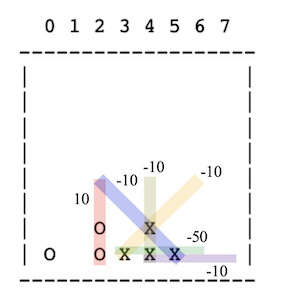

(Note that the two winning configurations for X in the lower right corner are not mutually exclusive, and
in fact an intelligent player would always choose to move to 6, so that a move to 7 is irrelevant; however,
considering all such interactions is too complicated, and in the eval function described below, we do
not account for these complications.)


Complete the following template and test it as shown.  

**HINT:**  The best way to write this is to adapt your `checkWin` function, which already enumerates all possible sequences which could produce a win. 
For each such sequence, count the number of 0's, 1's, and 2's. Then:

- If there are four 2's, then return `sys.maxsize` (a win for O);
- If there are four 1's, then return `-sys.maxsize` (a win for X);
- If there are two 0's and two 2's, then this is a sequence which should count for `TWO_SCORE`;
- If there is one 0 and three 2's, then this is a sequence which should count for `THREE_SCORE`;
- If there are two 0's and two 1's, then this is a sequence which should count for `-TWO_SCORE`; and
- If there is one 0 and three 1's, then this is a sequence which should count for `-THREE_SCORE`. 

Note that for the first two cases, as an alternative you could simply call your original `checkWin` before checking the other cases. 

In [10]:
import sys

OWIN = sys.maxsize
XWIN = -OWIN

THREE_SCORE = 50                  # just for testing, you may want to experiment with different values
TWO_SCORE = 10                    # for these two parameters


# Return evaluation of the board from O's point of view

def eval(board):
    pass
    return 0               # just to get it to compile, you must write this function


In [12]:
# tests with THREE_SCORE = 50 and TWO_SCORE = 10

def testEval(board):
    printBoard(board)
    print()
    print('eval(B) =',eval(board))

testEval(makeExample([3,0,4,2,5,2,4])); print()                               # eval(B) = -80 
testEval(makeExample([6, 5, 1])); print()                                     # eval(B) = 0
testEval(makeExample([0, 2, 6, 1, 2, 1])); print()                            # eval(B) = 20 
testEval(makeExample([2, 6, 6, 1, 4, 0, 3, 3, 3, 2])); print()                # eval(B) = -20 
testEval(makeExample([4, 3, 2, 6, 5, 3, 7, 5, 4, 4, 1, 2])); print()          # eval(B) = 90 
testEval(makeExample([3, 5, 6, 2, 2, 5, 7, 3, 6, 6, 5, 4, 6, 4, 4])); print() # eval(B) = -10 
testEval(makeExample([5, 1, 7, 0, 3, 6, 1, 4, 2, 2, 5, 0, 4, 5, 4, 2, 
                      3, 6, 6, 1, 1, 2, 2, 7, 6, 7, 2, 0, 0, 5, 4, 7, 
                      7, 4, 2])); print()                                     # eval(B) = -30 
r1 = [2, 1]*4; r2 = [1, 2]*4
testEval(np.array([r1,r2,r2,r1,r2,r2,r1,r2])); print()                        # eval(B) = 0 
testEval(makeExample([7, 1, 1, 5, 6, 1, 7, 6, 1, 3, 1, 2, 6, 0, 6])); print() # eval(B) = sys.maxsize 
testEval(makeExample([7, 7, 7, 4, 0, 0, 7, 6, 7, 2, 6, 6, 7, 6, 1])); print() # eval(B) = -sys.maxsize 

print()

### Part B

Now you must implement the `minMax` algorithm as described in lecture, with the following changes and additions:

- `minMax` as shown in the template must take the following parameters:

  - board -- the current board being evaluated
  - player -- either 1 (X) or 2 (O); the O player is the maximizing player (board is a max node) and X 
    is the minimizing player (board is a min node)
  - depth -- level of this call: the first call in `player` starts at level 0, and you should increase
    the depth by 1 for each recursive call to `minMax`
  - alpha,beta -- cutoff bounds as described in lecture. 

- `minMax` must return a pair `(score,move)` giving the min-max score calculated for the `board` and 
  the move that corresponds to this score. The move will only be used at the top level by `player`, and
  will be ignored by recursive calls to `minMax`. (However, it might be useful for tracing execution.)
  By this arrangement, you will not need a separate "chooseMove" function as shown in the lecture slides,
  and can simply use the first call to `minMax` to generate the move. 

- You must count the number of nodes examined (or, following the pseudo-code below, the number of calls to `minMax`); you may examine at most 10,000 nodes in any single call to `player`; as shown in the pseudo-code, 
  a new call to `minMax` above this limit should immediately return `(0,None)`.
  
- It is *strongly recommended* that you do *not* make multiple copies of the board (e.g., when creating child
  nodes); instead, use the "recursive backtracking" trick of making a move on the board before each
  recursive call, then *undoing* the move before the next call:
  
           for move in range(8):
               row = row that this move would be placed in
               board[row][move] =  player that is making this move           # make the move
               val = minMax(board, <other player>,  ....)
               board[row][move] = 0                                          # undo the move
                              

In [18]:
# Code for Part B

maxNodeLimit = 10000           # You can not change this
maxDepth = 3                   # You will want to change this and experiment with different values

countNodes = 0


def minMax(board, player, depth, alpha, beta):
   
    global countNodes
    countNodes += 1  
    
    if countNodes > maxNodeLimit:
        return (0,None)
    
    # evaluate the current board using eval(...) and then return its score if this is a leaf node, i.e.,
    # you have reached the maximum depth, or it is a win for one of the players

    
    # Otherwise, as in lecture, consider whether this is a maximizing player (O) or minimizing
    # player (X) and perform the min-max algorithm with alpha-beta pruning, plus whatever
    # additional strategies you can come up with
    
    # Note that when you make a recursive call, you don't need the move, so can just do:
    #         (score,_) = minMax(.....)
    
    #return (score,move)        # at end return the score and the best move 

    
    
# You will use this function in your interactive version below

def player(board):    
    (_,move) = minMax(board,O,0,-sys.maxsize,sys.maxsize)    # only place we need the move
    return move

In [13]:
# Some simple tests:  better testing can be done by running the interactive version from Part C
# Your results may vary slight from what is shown here, but should be similar

maxDepth = 1          # minMax will call eval on all children of root node

board1 = makeExample([3,4,2,5,2,6,2])
print()
printBoard(board1)
print("minMax:", minMax(board1,O,0,-sys.maxsize,sys.maxsize) )  # (9223372036854775807, 7)

board2 = makeExample([3,4,2,5,2,0,2])
print()
printBoard(board2)
print("minMax:", minMax(board2,O,0,-sys.maxsize,sys.maxsize) )  # (10, 2)

maxDepth = 2 

board2 = makeExample([3,4,2,5,2,0,2])
print()
printBoard(board2)
print("minMax:", minMax(board2,O,0,-sys.maxsize,sys.maxsize) )  # (-50, 2)

board3 = makeExample([3,0,4,4,3,4,5])
print()
printBoard(board3)
print("minMax:", minMax(board3,O,0,-sys.maxsize,sys.maxsize) )  # (-9223372036854775807, 7) every move loses!


### Part C

Now you must copy your code from Problem 1 C down to the next cell, but use `player` instead of `randomPlayer`,
and verify that your game works as you expect.  

Note the following requirements:

- You must print out the number of nodes examined (= number of times `minMax` is called)
- You must print out the elapsed time to make the call to `player`, you can use the `time` library as follows:

        import time

        t_start = time.perf_counter()
        code to be timed
        t_end = time.perf_counter()

        print("Time elapsed:", np.around(t_end-t_start,2), "secs.")       # will print out to 2 decimal places
        
A typical session is shown in the Appendix. 

In [14]:
import time

# Your code here

## Problem Three (Connect4 Contest) (10 pts)

For this problem, you will provide a complete listing of all necessary code in a single
code cell, so that we can copy it into a master notebook to run a contest among all
the submissions, plus Prof Snyder's implementation, and the random player.

You may examine at most 10,000 nodes, and you may take no longer than 30 seconds to make
a move (on my power Mac, which is quite fast, so this is just to make sure that you don't
do something completely crazy that takes absurd amounts of time).  There is no other restriction
on the depth, just that you may call `minMax` at most 10,000 times. 

We will run multiple versions of the contest, perhaps with slightly randomized
starting points (all with eval scores of 0 to "level the playing field"). 
At the end we will have a ranking of all submissions. 

For this part of the homework, you will receive points as follows:

- If you rank below the random player, you will receive 0 points;
- If you rank above Prof Snyder's player, you will receive 10 points and definite bragging rights;
- Otherwise, we will divide the remaining players into 10 intervals (we'll be generous),
  receiving from 1 to 10 points (thus you can still get 10 points even if you can't beat Snyder's player). 
  
Note: I have run similar contests in the past, and my experience has been that lots of students
were able to beat my player!  


**In the next code cell, keep the first line, add your name in the second line, and
then copy ALL CODE from the previous cells which would be necessary to run your `player` function.**

DO NOT copy down all the tests, just the code!

You do not have to copy down your interactive code, just the code necessary to run `player`; however
you may do so if you want to verify that everything works as expected. 

It would be an **excellent** idea to Restart and then just run this one cell, to make sure you have
copied down everything necessary. 


In [15]:
# Solution for Problem Three
# Your name:    




# your code here






## Appendix: Expected Outputs

### Problem 1 B

    Move outside range 0..7!

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |           X     |
    |       O X O     |
    | X     X O X   O |
    -------------------

      0 1 2 3 4 5 6 7
    -------------------
    | O X O X O X O X |
    | X O X O X O X O |
    | O X O X O X O X |
    | X O X O X O X O |
    | O X O X O X O X |
    | X O X O X O X O |
    | O X O X O X O X |
    | X O X O X O X O |
    -------------------

    No room in column 4: True 

    ERROR: Overflow in column.
   

### Problem 1 C

    -------- Win for X --------------------------------

    X's move: 3

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |       X         |
    -------------------

    O's move: 2

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |     O X         |
    -------------------

    X's move: 3

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |       X         |
    |     O X         |
    -------------------

    O's move: 2

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |     O X         |
    |     O X         |
    -------------------

    X's move: 3

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |       X         |
    |     O X         |
    |     O X         |
    -------------------

    O's move: 4

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |       X         |
    |     O X         |
    |     O X O       |
    -------------------

    X's move: 3

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |       X         |
    |       X         |
    |     O X         |
    |     O X O       |
    -------------------

    Win for X!
    Bye!


    ---------- Win for O ------------------------------

    X's move: 3

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |       X         |
    -------------------

    O's move: 2

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |     O X         |
    -------------------


    .... Many moves later .......


    O's move: 3

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |     X           |
    |     X   X     O |
    |     O O O   O O |
    | X O X X O   X X |
    | O X O X X X O O |
    -------------------

    X's move: 0

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |     X           |
    |     X   X     O |
    | X   O O O   O O |
    | X O X X O   X X |
    | O X O X X X O O |
    -------------------

    O's move: 1

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |     X           |
    |     X   X     O |
    | X O O O O   O O |
    | X O X X O   X X |
    | O X O X X X O O |
    -------------------

    Win for O!
    Bye!


    ----------- Error: Move not in range -----------------------------

    X's move: 3

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |       X         |
    -------------------

    O's move: 7

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |       X       O |
    -------------------

    X's move: 10
    Illegal move: not in range 0..7.
    Bye!


    ----------- Error: move to column already filled ------------

    X's move: 4

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |         X       |
    -------------------

    O's move: 3

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |       O X       |
    -------------------


    .... Many moves later.....



    X's move: 2

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |       X         |
    |       X         |
    |       X         |
    |       O         |
    |     X X X       |
    |   O X X X O   O |
    | O O X O X O O O |
    -------------------

    O's move: 3

      0 1 2 3 4 5 6 7
    -------------------
    |       O         |
    |       X         |
    |       X         |
    |       X         |
    |       O         |
    |     X X X       |
    |   O X X X O   O |
    | O O X O X O O O |
    -------------------

    X's move: 3
    Illegal move: column 3 is already full. 
    Bye!

### Problem 2 Part A

The details of the first test case were shown in the problem statement and several are obvious.  The ones which are not obvious are the following. 

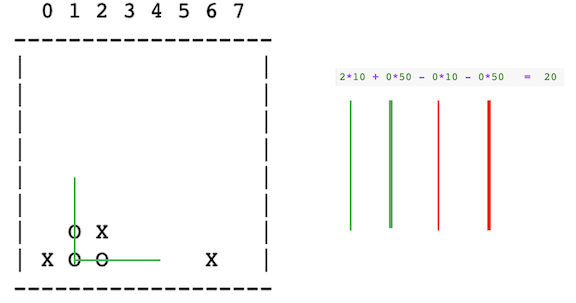


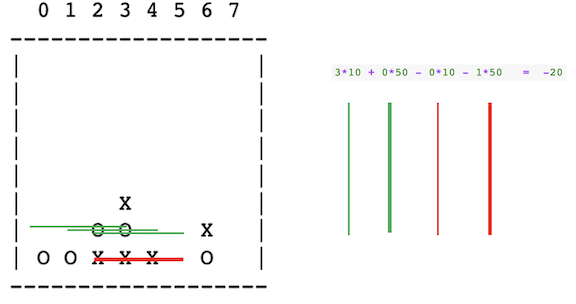

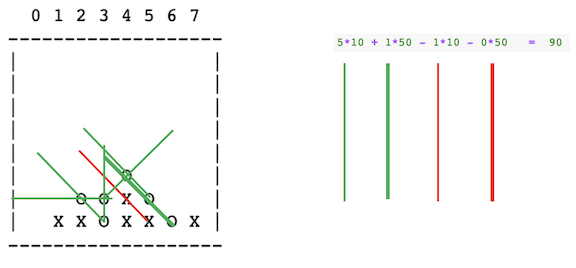

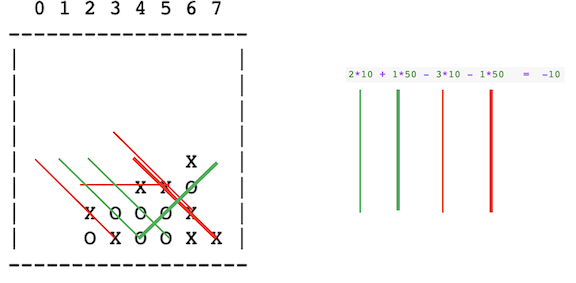

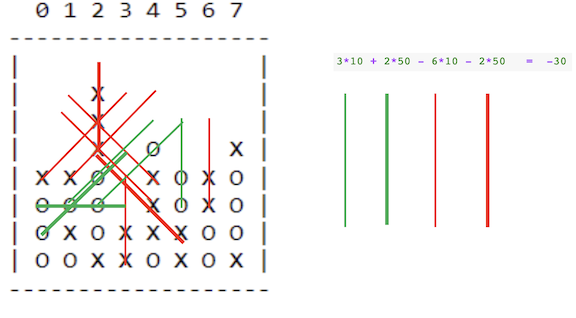

### Problem Two Part B

      0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |     X           |
     |     X           |
     |     X X O O O   |
     -------------------
    minMax: (9223372036854775807, 7)

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |     X           |
     |     X           |
     | O   X X O O     |
     -------------------
    minMax: (10, 2)

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |     X           |
     |     X           |
     | O   X X O O     |
     -------------------
    minMax: (-50, 2)

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |         O       |
     |       X O       |
     | O     X X X     |
     -------------------
    minMax: (-9223372036854775807, 7)
    
    
### Problem Two Part C

This trace was performed with a vanilla-flavored minMax (nothing other than alpha-beta pruning),
with a maxDepth of 5.  


    X's move: 3

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |       X         |
     -------------------

    O's move: 7

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |       X       O |
     -------------------
    Number of nodes examined: 10000             
    Elapsed time: 13.9 secs.

    X's move: 4

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |       X X     O |
     -------------------

    O's move: 5

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |       X X O   O |
     -------------------
    Number of nodes examined: 9111
    Elapsed time: 12.5 secs.

    X's move: 4

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |         X       |
     |       X X O   O |
     -------------------

    O's move: 4

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |         O       |
     |         X       |
     |       X X O   O |
     -------------------
    Number of nodes examined: 9050
    Elapsed time: 12.53 secs.

    X's move: 2

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |         O       |
     |         X       |
     |     X X X O   O |
     -------------------

    O's move: 1

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |         O       |
     |         X       |
     |   O X X X O   O |
     -------------------
    Number of nodes examined: 2899
    Elapsed time: 4.01 secs.

    X's move: 3

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |         O       |
     |       X X       |
     |   O X X X O   O |
     -------------------

    O's move: 5

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |         O       |
     |       X X O     |
     |   O X X X O   O |
     -------------------
    Number of nodes examined: 6609
    Elapsed time: 9.29 secs.

    X's move: 3

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |       X O       |
     |       X X O     |
     |   O X X X O   O |
     -------------------

    O's move: 3

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |       O         |
     |       X O       |
     |       X X O     |
     |   O X X X O   O |
     -------------------
    Number of nodes examined: 6912
    Elapsed time: 8.96 secs.

    X's move: 2

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |       O         |
     |       X O       |
     |     X X X O     |
     |   O X X X O   O |
     -------------------

    O's move: 6

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |       O         |
     |       X O       |
     |     X X X O     |
     |   O X X X O O O |
     -------------------
    Number of nodes examined: 3953
    Elapsed time: 4.87 secs.

    Win for O!
    Bye!